# GWRATES complete exmaples

* Please refer to the [documentation](https://ler.readthedocs.io/en/latest/) for more details.

## Short BBH (Binary Black Hole) example with three detectors
* This part of the notebook is a short example to simulate a binary black hole mergers and calculate its rate ($yr^{-1}$).
* All generated data is saved in the `ler_data` folder.
* All interpolation data is saved in the `interpolator_pickle` folder.

In [1]:
# call the GWRATES class
from ler.rates import GWRATES

* class initialization
* if you want the models and its parameters to print.

    ```ler = GWRATES()```
    
* set 'npool' according to your machine's available CPU cores. Default is 4.
* to check no. of cores, 

    ```import multiprocessing as mp```
    
    ```print(mp.cpu_count())```

In [3]:
# GWRATES initialization with default arguments
ler = GWRATES(npool=8, waveform_approximant='IMRPhenomXPHM', snr_type='interpolation_aligned_spins_jax', spin_zero=False, spin_precession=True)  # for testing: waveform_approximant='IMRPhenomXPHM', snr_type='inner_product'


Initializing GWRATES class...


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_pickle/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_2.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_detector_frame_3.pickle
using user provided custom source redshift class/object

Initializing CBCSourceParameterDistribution...

using ler available zs function : source_redshift
using ler available source_frame_masses function : binary_masses_BBH_popI_II_po

100%|███████████████████████████████████████████████████| 3996800/3996800 [57:00<00:00, 1168.54it/s]



Saving Partial-SNR for L1 detector with shape (50, 200, 20, 20)

Saving Partial-SNR for H1 detector with shape (50, 200, 20, 20)

Saving Partial-SNR for V1 detector with shape (50, 200, 20, 20)

Chosen GWSNR initialization parameters:

npool:  4
snr type:  interpolation_aligned_spins_jax
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/si

In [6]:
ler.gw_cbc_statistics(10)

Simulated GW params will be stored in ./ler_data/gw_param.json
chosen batch size = 50000 with total size = 10
There will be 1 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with interpolation
gw parameters already sampled.


{'zs': array([5.25335637, 2.6289837 , 2.66499964, 3.13957086,
        0.98233592, 1.5392795 , 5.57271648, 1.92172304,
        1.7835467 , 3.54963782]),
 'geocent_time': array([1.24297629e+09, 1.26864871e+09, 1.25818533e+09,
        1.26785768e+09, 1.25461775e+09, 1.26264066e+09,
        1.23977969e+09, 1.26511843e+09, 1.26616666e+09,
        1.24614830e+09]),
 'ra': array([0.67939595, 5.08440543, 2.85684954, 5.33489544,
        0.40855684, 4.62928981, 1.17481997, 5.43108266,
        5.23345818, 6.15902408]),
 'dec': array([ 0.8616668 , -0.39474146, -0.99508649,  0.23936204,
         1.18482107, -0.53645155, -0.82412545,  0.99654592,
         0.2765832 , -0.86022427]),
 'phase': array([3.71803867, 6.21474507, 2.07215926, 4.39852391,
        1.41566878, 3.86047871, 2.89892752, 4.31028184,
        6.20766506, 2.87961675]),
 'psi': array([1.51947022, 1.9342848 , 1.77756189, 3.05083375,
        0.30977783, 1.18391385, 2.15359035, 1.71182953,
        1.73698192, 0.2719669 ]),
 'theta_jn': ar

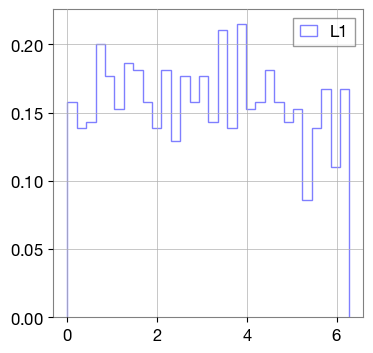

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=[4,4])
plt.hist(ler.phi_jl(1000), bins=30, density=True, alpha=0.5, color='b', histtype='step', label='L1')
plt.legend()
plt.show()

In [16]:
ler.gw_param_samplers_params

{'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.1, 'b4': 30},
 'zs': None,
 'source_frame_masses': {'mminbh': 4.98,
  'mmaxbh': 112.5,
  'alpha': 3.78,
  'mu_g': 32.27,
  'sigma_g': 3.88,
  'lambda_peak': 0.03,
  'delta_m': 4.8,
  'beta': 0.81},
 'geocent_time': {'xmin': 1238166018,
  'xmax': 1269723618.0,
  'min_': 1238166018,
  'max_': 1269702018},
 'ra': {'xmin': 0.0,
  'xmax': 6.283185307179586,
  'min_': 0.0,
  'max_': 6.283185307179586},
 'dec': None,
 'phase': {'xmin': 0.0,
  'xmax': 6.283185307179586,
  'min_': 0.0,
  'max_': 6.283185307179586},
 'psi': {'xmin': 0.0,
  'xmax': 3.141592653589793,
  'min_': 0.0,
  'max_': 3.141592653589793},
 'theta_jn': None,
 'a_1': {'xmin': -0.8, 'xmax': 0.8, 'min_': 0.0, 'max_': 0.8},
 'a_2': {'xmin': 0.0, 'xmax': 1.0, 'min_': 0.0, 'max_': 0.8},
 'tilt_1': None,
 'tilt_2': None,
 'phi_12': {'xmin': 0.0,
  'xmax': 6.283185307179586,
  'min_': 0,
  'max_': 6.283185307179586},
 'phi_jl': {'xmin': 0.0,
  'xmax': 6.283185307179586,
  '

## Simulation of the GW CBC population

* this will generate a json file with the simulated population parameters
* by default 100,000 events will be sampled with batches of 50,000. 
* results will be saved in the same directory as json file.
* resume=True will resume the simulation from the last saved batch.
* if you need to save the file at the end of each batch sampling, set save_batch=True.

In [6]:
# ler.batch_size = 100000 # for faster computation
param = ler.gw_cbc_statistics(size=100000, resume=False)

Simulated GW params will be stored in ./ler_data/gw_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 46952/46952 [00:56<00:00, 834.72it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 46849/46849 [00:55<00:00, 845.31it/s]


saving all gw parameters in ./ler_data/gw_param.json 


* generate detectable events
* note: here no input param is provided, so it will track the json file generated above
* final rate is the rate of detectable events

In [7]:
rate, param_detectable = ler.gw_rate()

Getting GW parameters from json file ./ler_data/gw_param.json...
given detectability_condition == 'step_function'
total GW event rate (yr^-1): 462.93700827520803
number of simulated GW detectable events: 563
number of simulated all GW events: 100000
storing detectable params in ./ler_data/gw_param_detectable.json


* look for available parameters
* **Note:** This is for spin-less systems.

In [7]:
param_detectable.keys()

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'snr_net'])

* all gwrates initialization parameters, simulated parameters's json file names and rate results are strored as json file in the `ler_data` directory by default.
* Now, let's see all the LeR class initialization parameters. This is either get from the json file '.ler_data/gwrates_params.json' or from the ler object.

In [8]:
# what are the saved files?
#ler.json_file_names, ler.ler_directory
print(f"ler directory: {ler.ler_directory}")
print(f"ler json file names: {ler.json_file_names}")

ler directory: ./ler_data
ler json file names: {'gwrates_params': 'gwrates_params.json', 'gw_param': 'gw_param.json', 'gw_param_detectable': 'gw_param_detectable.json'}


In [9]:
# the generated parameters are not store in the ler instance, but in the json files
# you can quickly access the generated parameters from the json files as shown below
param_detectable = ler.gw_param_detectable
# param = ler.gw_param

# print keys of the generated parameters
print(f"param_detectable keys: {param_detectable.keys()}")

param_detectable keys: dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'snr_net'])


* here is another way to access the generated parameters from the json files

In [10]:
from ler.utils import get_param_from_json

param_detectable = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['gw_param_detectable'])
# param = get_param_from_json(ler.ler_directory+'/'+ler.json_file_names['gw_param'])

# print keys of the generated parameters
print(f"param_detectable keys: {param_detectable.keys()}")

param_detectable keys: dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'snr_net'])


* Note: all GWRATES initialization parameters and some important results are saved in a json file.

In [11]:
from ler.utils import load_json
# gwrates_params = load_json(ler.ler_directory+"/"+ler.json_file_names["gwrates_params"])
gwrates_params = load_json('ler_data/gwrates_params.json')
print(gwrates_params.keys())
print("detectable_gw_rate_per_year: ", gwrates_params['detectable_gw_rate_per_year'])

dict_keys(['npool', 'z_min', 'z_max', 'size', 'batch_size', 'cosmology', 'snr_finder', 'json_file_names', 'interpolator_directory', 'gw_param_sampler_dict', 'snr_calculator_dict', 'detectable_gw_rate_per_year', 'detectability_condition'])
detectable_gw_rate_per_year:  452.39505816387026


## Plot the generated parameters

* plotting the redshift distribution of event parameters

getting gw_params from json file ler_data/gw_param_detectable.json...
getting gw_params from json file ler_data/gw_param.json...


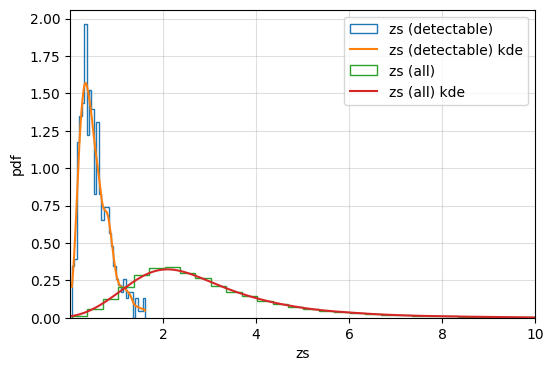

In [12]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt


# input param_dict can be either a dictionary or a json file name that contains the parameters
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/gw_param_detectable.json',
    plot_label='zs (detectable)',
)
lerplt.param_plot(
    param_name='zs',
    param_dict='ler_data/gw_param.json',
    plot_label='zs (all)',
)
plt.xlim(0.001,10)
plt.xlabel('zs')
plt.ylabel('pdf')
plt.grid(alpha=0.4)
plt.show()

## Custom functions
* `ler` allows internal model functions to be change with custom functions.
* It also allows to change the default parameters of the existing model functions.

First let's look at what are the input parameters available for ler.GWRATES. The input paramters can divided into three categories

1. GWRATES set up params
2. CBCSourceParameterDistribution set up params (as kwargs)
3. GWSNR set up params (as kwargs)

Complete GWRATES initialization is shown below,

In [13]:
# # below is the example of GWRATES initialization with all the arguments.
# # Uncomment the below code if you need to change the default arguments.
# from ler.rates import GWRATES
# import numpy as np
# import matplotlib.pyplot as plt
# from astropy.cosmology import LambdaCDM

# ler = GWRATES(
#     # GWRATES setup arguments
#     npool=4, # number of processors to use
#     z_min=0.0, # minimum redshift
#     z_max=10.0, # maximum redshift
#     event_type='BBH', # event type
#     size=100000, # number of events to simulate
#     batch_size=50000, # batch size
#     cosmology=LambdaCDM(H0=70, Om0=0.3, Ode0=0.7), # cosmology
#     snr_finder=None, # snr calculator from 'gwsnr' package will be used
#     pdet_finder=None,  # will not be consider unless specified
#     list_of_detectors=None, # list of detectors that will be considered when calculating snr or pdet for lensed events. if None, all the detectors from 'gwsnr' will be considered
#     json_file_names=dict(
#         ler_params="ler_params.json", # to store initialization parameters and important results
#         unlensed_param="unlensed_param.json", # to store all unlensed events
#         unlensed_param_detectable="unlensed_param_detectable.json", # to store only detectable unlensed events
#         lensed_param="lensed_param.json", # to store all lensed events 
#         lensed_param_detectable="lensed_param_detectable.json"), # to store only detectable lensed events
#     interpolator_directory='./interpolator_pickle', # directory to store the interpolator pickle files. 'ler' uses interpolation to get values of various functions to speed up the calculations (relying on numba njit).
#     ler_directory='./ler_data', # directory to store all the outputs
#     verbose=False, # if True, will print all information at initialization

#     # CBCSourceParameterDistribution class arguments
#     source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': 'binary_masses_BBH_popI_II_powerlaw_gaussian', 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine'},
#     source_priors_params= {'merger_rate_density': {'R0': 2.39e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'source_frame_masses': {'mminbh': 4.98, 'mmaxbh': 112.5, 'alpha': 3.78, 'mu_g': 32.27, 'sigma_g': 3.88, 'lambda_peak': 0.03, 'delta_m': 4.8, 'beta': 0.81}, 'zs': None, 'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 'dec': None, 'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 'theta_jn': None},
#     spin_zero= True, # if True, spins will be set to zero
#     spin_precession= False, # if True, spins will be precessing

#     # gwsnr package arguments
#     mtot_min = 2.0,
#     mtot_max = 184.98599853446768,
#     ratio_min = 0.1,
#     ratio_max = 1.0,
#     mtot_resolution = 500,
#     ratio_resolution = 50,
#     sampling_frequency = 2048.0,
#     waveform_approximant = 'IMRPhenomD',
#     minimum_frequency = 20.0,
#     snr_type = 'interpolation',
#     psds = {'L1':'aLIGO_O4_high_asd.txt','H1':'aLIGO_O4_high_asd.txt', 'V1':'AdV_asd.txt', 'K1':'KAGRA_design_asd.txt'},
#     ifos = ['L1', 'H1', 'V1'],
#     interpolator_dir = './interpolator_pickle',
#     gwsnr_verbose = False,
#     multiprocessing_verbose = True,
#     mtot_cut = True,

#     # common arguments, to generate interpolator
#     create_new_interpolator = dict(
#         redshift_distribution=dict(create_new=False, resolution=1000),
#         z_to_luminosity_distance=dict(create_new=False, resolution=1000),
#         differential_comoving_volume=dict(create_new=False, resolution=1000),
#         Dl_to_z=dict(create_new=False, resolution=1000),
#     )
# )

As an example, I will change,

* merger_rate_density_params's default value of **local merger rate density** ($R_0$) to $38.8\times 10^{-9} Mpc^{-3} yr^{-1}$ (upper limit of GWTC-3). But, I am still using the default merger_rate_density function, which is 'merger_rate_density_bbh_popI_II_oguri2018'. Note that the accepted $R_0$ value in GWTC-3 is $23.9_{-8.6}^{+14.9}\times 10^{-9} \; Mpc^{-3} yr^{-1}$.

* **source_frame_masses** to a custom function. This is similar to the internal default function, i.e. PowerLaw+Peak model. I am using `gwcosmo`'s powerlaw_gaussian prior for this example.

* `gwsnr` parameters: By default, it uses 'IMRPhenomD' **waveform model** with no spin. It uses interpolation method to find the 'snr' and it is super fast. But for the example below, I am using 'IMRPhenomXPHM` with precessing spins. This is without interpolation but through inner product method. It will be slower.

**Note:** All custom functions sampler should have 'size' as the only input.

In [14]:
from gwcosmo import priors as p

# define your custom function of mass_1_source and mass_2_source calculation
# it should have 'size' as the only argument
def powerlaw_peak(size):
    """
    Function to sample mass1 and mass2 from a powerlaw with a gaussian peak

    Parameters
    ----------
    size : `int`
        Number of samples to draw

    Returns
    -------
    mass_1_source : `numpy.ndarray`
        Array of mass1 samples
    mass_2_source : `numpy.ndarray`
        Array of mass2 samples
    """

    # below is the gwcosmo default values
    mminbh=4.98  # Minimum mass of the black hole (Msun)
    mmaxbh=86.22  # Maximum mass of the black hole (Msun) 
    alpha=2.63  # Spectral index for the powerlaw of the primary mass distribution
    mu_g=33.07  # Mean of the Gaussian component in the primary mass distribution
    sigma_g=5.69  # Width of the Gaussian component in the primary mass distribution
    lambda_peak=0.10  # Fraction of the model in the Gaussian component
    delta_m=4.82  # Range of mass tapering on the lower end of the mass distribution
    beta=1.26  # Spectral index for the powerlaw of the mass ratio distribution

    model = p.BBH_powerlaw_gaussian(
        mminbh=mminbh,
        mmaxbh=mmaxbh,
        alpha=alpha,
        mu_g=mu_g,
        sigma_g=sigma_g,
        lambda_peak=lambda_peak,
        delta_m=delta_m,
        beta=beta,
    )
    # sample mass1 and mass2
    mass_1_source, mass_2_source = model.sample(Nsample=size)

    return (mass_1_source, mass_2_source)

* Initialize the class with the custom function
* changing gwrates input params

In [15]:
from ler.rates import GWRATES
import numpy as np

ler = GWRATES(npool=4, verbose=False,
    source_priors=dict(
        merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
        source_frame_masses=powerlaw_peak,
    ),
   source_priors_params=dict(
        merger_rate_density=dict(
            R0=38.8e-09,
            b2=1.6,
            b3=2.0,
            b4=30
        ),
        source_frame_masses=dict(
            mminbh=4.98,
            mmaxbh=86.22,
            alpha=2.63,
            mu_g=33.07,
            sigma_g=5.69,
            lambda_peak=0.10,
            delta_m=4.82,
            beta=1.26
        ),
   ),
   waveform_approximant = 'IMRPhenomXPHM',
   snr_type='inner_product',
   spin_zero=False,
   spin_precession=True,
)

* since I am using inner product to calculate snr, it will take longer time to simulate the events.

* You can increase the speed by allocating more CPU cores to the code. For example, if you have 8 logical cores, set npool>4

In [16]:
ler.batch_size = 50000 # you can also set the batch size at GWRATES initialization
ler.gw_cbc_statistics(size=100000, resume=False, output_jsonfile = 'new_gw_params.json');

Simulated GW params will be stored in ./ler_data/new_gw_params.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40687/40687 [00:56<00:00, 721.25it/s]


Batch no. 2
sampling gw source params...
calculating snrs...
solving SNR with inner product


100%|████████████████████████████████████████████████████████| 40735/40735 [00:55<00:00, 740.46it/s]


saving all gw_params in ./ler_data/new_gw_params.json...


* generate detectable events
* and get the rate of detectable events
* You have two choice to input the generated parameters, either as json file name or as a dict

In [17]:
# ler.gw_rate(); # this is short hand for the following
rate, param_detectable = ler.gw_rate(
    gw_param='new_gw_params.json',
    snr_threshold=8.0,
    output_jsonfile='new_gw_params_detectable.json',
)

Getting GW parameters from json file ./ler_data/new_gw_params.json...
given detectability_condition == 'step_function'
total GW event rate (yr^-1): 1554.5760498550699
number of simulated GW detectable events: 925
number of simulated all GW events: 100000
storing detectable params in ./ler_data/new_gw_params_detectable.json


### How to look for available model functions?

* All available names are stored as a dict in `ler` instance

* the keys of this dict shows the parameter type

* the values are also dict, where the keys are the model function names and the values are their input parameters

In [18]:
# let's look at one of the dict key
ler.available_gw_prior_list_and_its_params['source_frame_masses']

{'binary_masses_BBH_popI_II_powerlaw_gaussian': {'mminbh': 4.98,
  'mmaxbh': 112.5,
  'alpha': 3.78,
  'mu_g': 32.27,
  'sigma_g': 3.88,
  'lambda_peak': 0.03,
  'delta_m': 4.8,
  'beta': 0.81},
 'binary_masses_BBH_popIII_lognormal': {'Mc': 30.0, 'sigma': 0.3, 'beta': 1.1},
 'binary_masses_BBH_primordial_lognormal': {'Mc': 30.0,
  'sigma': 0.3,
  'beta': 1.1},
 'binary_masses_BNS_gwcosmo': {'mminns': 1.0, 'mmaxns': 3.0, 'alphans': 0.0},
 'binary_masses_BNS_bimodal': {'w': 0.643,
  'muL': 1.352,
  'sigmaL': 0.08,
  'muR': 1.88,
  'sigmaR': 0.3,
  'mmin': 1.0,
  'mmax': 2.3}}

* for looking at the choosen models and its input parameters

In [19]:
print(ler.gw_param_samplers)
print(ler.gw_param_samplers_params)

{'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': <function powerlaw_peak at 0x32cfdacb0>, 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine', 'a_1': 'sampler_uniform', 'a_2': 'sampler_uniform', 'tilt_1': 'sampler_sine', 'tilt_2': 'sampler_sine', 'phi_12': 'sampler_uniform', 'phi_jl': 'sampler_uniform'}
{'merger_rate_density': {'R0': 3.88e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}, 'source_frame_masses': {'mminbh': 4.98, 'mmaxbh': 86.22, 'alpha': 2.63, 'mu_g': 33.07, 'sigma_g': 5.69, 'lambda_peak': 0.1, 'delta_m': 4.82, 'beta': 1.26}, 'zs': None, 'geocent_time': {'min_': 1238166018, 'max_': 1269702018}, 'ra': {'min_': 0.0, 'max_': 6.283185307179586}, 'dec': None, 'phase': {'min_': 0.0, 'max_': 6.283185307179586}, 'psi': {'min_': 0.0, 'max_': 3.141592653589793}, 'theta_jn': None, 'a_1': {'min_': 0.0, 'max_'

## Using internal model functions

### Mass distribution of BBH (mass-1, larger mass only)

* compare the default mass distribution with the custom mass distribution

In [20]:
# calling the default mass distribution model
mass_1_source, mass_2_source = ler.binary_masses_BBH_popI_II_powerlaw_gaussian(size=10000)
default_model_dict = dict(mass_1_source=mass_1_source)

# calling the custom mass distribution model
mass_1_source, mass_2_source = powerlaw_peak(size=10000)
custom_model_dict = dict(mass_1_source=mass_1_source)

* let's do a comparision plot between you custom model and the default model

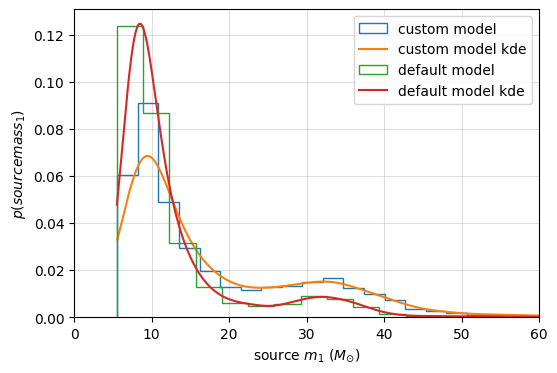

In [21]:
import matplotlib.pyplot as plt
from ler.utils import plots as lerplt

# let's do a comparision plot between you custom model and the default model
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=custom_model_dict, # or the json file name
    plot_label='custom model',
);
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=default_model_dict,
    plot_label='default model',
);
plt.xlabel(r'source $m_1$ ($M_{\odot}$)')
plt.ylabel(r'$p(source mass_1)$')
plt.xlim(0,60)
plt.grid(alpha=0.4)
plt.show()

## Generating particular number of detectable events

* this is particularly useful when you want only the detectable events to be saved in the json file

* detectable event rates will be calculated at each batches. Subsequent batch will consider the previous batch's detectable events. So, the rates will become more accurate as the iterations increases and will converge to a stable value at higher samples. 

* you can resume the rate calculation from the last saved batch.

In [ ]:
from ler.rates import GWRATES
ler = GWRATES(
    npool=6,
    verbose=False,
)

* sampling till desired number of detectable events are found

In [23]:
n_size_param = ler.selecting_n_gw_detectable_events(
    size=5000, 
    snr_threshold=8.0,
    batch_size=100000,
    resume=False,
    output_jsonfile='gw_params_n_detectable.json',
    meta_data_file="meta_gw.json",
    )

collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  386
total number of events =  100000
total rate (yr^-1): 399.5983808953179
given detectability_condition == 'step_function'
collected number of detectable events =  788
total number of events =  200000
total rate (yr^-1): 407.8802126237183
given detectability_condition == 'step_function'
collected number of detectable events =  1201
total number of events =  300000
total rate (yr^-1): 414.43666274203525
given detectability_condition == 'step_function'
collected number of detectable events =  1670
total number of events =  400000
total rate (yr^-1): 432.2080933258944
given detectability_condition == 'step_function'
collected number of detectable events =  2086
total number of events =  500000
total rate (yr^-1): 431.89752463607937
given detectability_condition == 'step_function'
collected number of detectable events =  2506
total number of events =  600000

In [24]:
ler.json_file_names.keys()

dict_keys(['gwrates_params', 'gw_param', 'gw_param_detectable', 'n_gw_detectable_events'])

**Important Note**: At each iteration, rate is calculated using the cummulatively increasing number of events. It become stable at around 2 million events. This is the number of events that is required to get a stable rate.

* Now get the sampled (detectable) events.

In [25]:
print(n_size_param.keys())
print(f"size of each parameters={len(n_size_param['zs'])}")

dict_keys(['zs', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'L1', 'H1', 'V1', 'snr_net'])
size of each parameters=5000


* let's see the meta file

In [26]:
from ler.utils import load_json

meta_data = load_json('ler_data/meta_gw.json')
print(meta_data.keys())

dict_keys(['events_total', 'detectable_events', 'total_rate'])


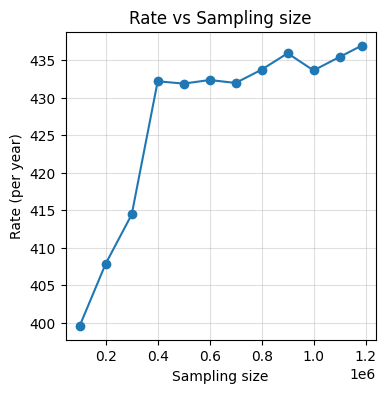

In [27]:
import matplotlib.pyplot as plt

# plot the rate vs sampling size
plt.figure(figsize=(4,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

* the rate will converge to a stable value at higher samples.

## Using custom detection criteria

* I leverage the ANN (Artificial Neural Network) based SNR calculator from gwsnr. It can predict SNR>8 with 99.9% accuracy for the astrophysical parameters. But to make it 100% accurate, I will recalculate SNR some of the events using inner product method. GWRATES can do this automatically. 

* I will test two cases using: 
  * pdet (probability of detection) with ANN
  * SNR with ANN.

In [28]:
from ler.rates import LeR
from gwsnr import GWSNR
import numpy as np

* pdet only calculation

In [29]:
snr_ = GWSNR(gwsnr_verbose=True, pdet=True, snr_type='ann', waveform_approximant='IMRPhenomXPHM')

psds not given. Choosing bilby's default psds
Intel processor has trouble allocating memory when the data is huge. So, by default for IMRPhenomXPHM, duration_max = 64.0. Otherwise, set to some max value like duration_max = 600.0 (10 mins)
Interpolator will be generated for L1 detector at ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be generated for H1 detector at ./interpolator_pickle/H1/partialSNR_dict_1.pickle
Interpolator will be generated for V1 detector at ./interpolator_pickle/V1/partialSNR_dict_1.pickle
Please be patient while the interpolator is generated
Generating interpolator for ['L1', 'H1', 'V1'] detectors


interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [03:17<00:00,  3.96s/it]


Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/aLIGO_O4_high_asd.txt'), PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/bilby/gw/detector/noise_curves/AdV_asd.txt')]


* Pdet calculator test

In [30]:
# initialization pdet calculator
pdet_calculator = snr_.snr
mass_1 = np.array([5, 10.,50.,200.])
ratio = np.array([1, 0.8,0.5,0.2])
luminosity_distance = np.array([1000, 2000, 3000, 4000])
# test
pdet = pdet_calculator(
    gw_param_dict=dict(
        mass_1=mass_1,
        mass_2=mass_1*ratio,
        luminosity_distance=luminosity_distance,
    )
)
inner_product_snr = snr_.compute_bilby_snr(
    mass_1=mass_1,
    mass_2=mass_1*ratio,
    luminosity_distance=luminosity_distance,
)

print(f"pdet: {pdet}")
print(f"inner_product_snr: {inner_product_snr}")

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.05s/it]

pdet: {'L1': array([0, 0, 1, 0]), 'H1': array([0, 0, 0, 0]), 'V1': array([0, 0, 0, 0]), 'pdet_net': array([1, 0, 1, 0])}
inner_product_snr: {'L1': array([ 7.4441411 ,  5.85368923, 10.64502665,  0.        ]), 'H1': array([4.73471203, 3.72313373, 6.77057769, 0.        ]), 'V1': array([2.23257635, 1.73563896, 3.21070702, 0.        ]), 'snr_net': array([ 9.10039185,  7.15121283, 13.01790898,  0.        ])}


* Below is an example of general case of initialising with any type of pdet calculator.

* Refer to the [documentation](https://ler.readthedocs.io/en/latest/examples/rates/grb%20detection%20rate.html) example for extra details, where I have used pdet for GRB (gamma-ray-burst) detection.

In [31]:
from ler.rates import GWRATES

ler = GWRATES(verbose=False, pdet_finder=pdet_calculator, spin_zero=False,
    spin_precession=True)

In [32]:
param = ler.gw_cbc_statistics();

Simulated GW params will be stored in ./ler_data/gw_param.json
chosen batch size = 50000 with total size = 100000
There will be 2 batche(s)
Batch no. 1
sampling gw source params...
calculating pdet...
Batch no. 2
sampling gw source params...
calculating pdet...
saving all gw_params in ./ler_data/gw_param.json...


In [33]:
_, param_detectable = ler.gw_rate(detectability_condition='pdet')

Getting GW parameters from json file ./ler_data/gw_param.json...
given detectability_condition == 'pdet'
total GW event rate (yr^-1): 477.24055334907143
number of simulated GW detectable events: 461
number of simulated all GW events: 100000
storing detectable params in ./ler_data/gw_param_detectable.json


### SNR (with ANN) + SNR recalculation (inner product)

In [34]:
from ler.rates import GWRATES

# ler initialization with gwsnr arguments
ler = GWRATES(npool=6, verbose=False, snr_type='ann', waveform_approximant='IMRPhenomXPHM', spin_zero=False,
    spin_precession=True)

In [35]:
param = ler.selecting_n_gw_detectable_events(
    size=500, 
    snr_threshold=8.0,
    batch_size=50000,
    resume=True,
    trim_to_size=False,
    output_jsonfile='gw_params_n_detectable_ann.json',
    meta_data_file="meta_gw_ann.json",
    snr_recalculation=True,
    snr_threshold_recalculation=[4,20], # it will recalculate SNR for events with (SNR_ANN > 4) and (SNR_ANN < 20)
    )

collected number of detectable events =  0


100%|██████████████████████████████████████████████████████████| 1674/1674 [00:06<00:00, 257.10it/s]


given detectability_condition == 'step_function'
collected number of detectable events =  212
total number of events =  50000
total rate (yr^-1): 438.9370816052197


100%|██████████████████████████████████████████████████████████| 1544/1544 [00:05<00:00, 281.79it/s]


given detectability_condition == 'step_function'
collected number of detectable events =  444
total number of events =  100000
total rate (yr^-1): 459.64166092622065


100%|██████████████████████████████████████████████████████████| 1609/1609 [00:05<00:00, 292.65it/s]

given detectability_condition == 'step_function'
collected number of detectable events =  655
total number of events =  150000
total rate (yr^-1): 452.04998184185365
stored detectable gw params in ./ler_data/gw_params_n_detectable_ann.json
stored meta data in ./ler_data/meta_gw_ann.json


In [36]:
# # Uncomment the following to check the accuracy of the above method.
# # with the `inner product`

# from ler.rates import GWRATES
# # class initialization
# ler = GWRATES(npool=6, verbose=False, snr_type='inner_product', waveform_approximant='IMRPhenomXPHM')
# # event sampling
# # 
# param = ler.selecting_n_gw_detectable_events(
#     size=500, 
#     snr_threshold=8.0,
#     batch_size=50000,
#     resume=True,
#     trim_to_size=False,
#     output_jsonfile='gw_params_n_detectable_inner_product.json',
#     meta_data_file="meta_gw_inner_product.json",
#     snr_recalculation=True,
#     snr_threshold_recalculation=[4,20], # it will recalculate SNR for events with (SNR_ANN > 4) and (SNR_ANN < 20)
#     )

* close enough
* For more matching results, you can increase the number of events to 1,000,000 or more.

## BNS (Binary Neutron Star) example

* All you need is to change is `event_type` in class initialization to 'BNS'.
* But in this example, I will also change the detector network to ['CE', 'ET']. These are future 3rd generation detectors. Since, they are more sensitive, I will change the redshift range to 0-20 (z_max=20).
* The default mass distribution model has a mass-cutoff of 2.3 Msun. So, the maximum possible redshifted total mass is (2.3+2.3)*(1+z_max)=96.6. This allows, gwsnr to have a good interpolation for the snr values.
* Difference in the models for BNS and BBH are:
    * mass distribution model: bimodal distribution. Refer to [Will M. Farr et al. 2020](https://arxiv.org/pdf/2005.00032.pdf) Eqn. 6
    * merger rate density model parameter: local merger rate density value from [GWTC-3 catalog, Section IV A](https://journals.aps.org/prx/pdf/10.1103/PhysRevX.13.011048).

In [37]:
from ler.rates import GWRATES

# z_max = 20. So maximum redshifted total mass is 2.3*(1+z_max) * 2 = 96.6
ler = GWRATES(event_type='BNS', ifos=['CE', 'ET'], z_min=0, z_max=20, mtot_max=96.6, verbose=True)

z_to_luminosity_distance interpolator will be generated at ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be generated at ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_1.pickle
merger_rate_density interpolator will be generated at ./interpolator_pickle/merger_rate_density/merger_rate_density_2.pickle
binary_masses_BNS_bimodal interpolator will be generated at ./interpolator_pickle/binary_masses_BNS_bimodal/binary_masses_BNS_bimodal_0.pickle
Interpolator will be generated for CE detector at ./interpolator_pickle/CE/partialSNR_dict_0.pickle
Interpolator will be generated for ET1 detector at ./interpolator_pickle/ET1/partialSNR_dict_0.pickle
Interpolator will be generated for ET2 detector at ./interpolator_pickle/ET2/partialSNR_dict_0.pickle
Interpolator will be generated for ET3 detector at ./interpolator_pickle/ET3/partialSNR_dict_0.pickle
Please be patient while the interp

interpolation for each mass_ratios: 100%|███████████████████████████| 50/50 [03:04<00:00,  3.69s/it]


 GWRATES set up params:
npool = 4,
z_min = 0,
z_max = 20,
event_type = 'BNS',
size = 100000,
batch_size = 50000,
cosmology = LambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None),
snr_finder = <bound method GWSNR.snr of <gwsnr.gwsnr.GWSNR object at 0x32d1999f0>>,
json_file_names = {'gwrates_params': 'gwrates_params.json', 'gw_param': 'gw_param.json', 'gw_param_detectable': 'gw_param_detectable.json'},
interpolator_directory = ./interpolator_pickle,
ler_directory = ./ler_data,

 GWRATES also takes CBCSourceParameterDistribution params as kwargs, as follows:
source_priors = {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018', 'source_frame_masses': 'binary_masses_BNS_bimodal', 'zs': 'sample_source_redshift', 'geocent_time': 'sampler_uniform', 'ra': 'sampler_uniform', 'dec': 'sampler_cosine', 'phase': 'sampler_uniform', 'psi': 'sampler_uniform', 'theta_jn': 'sampler_sine'},
source_priors_params = {'merger_rate_density': {'R0': 1.0

In [38]:
ler.batch_size = 100000
param = ler.gw_cbc_statistics(size=500000, resume=False, save_batch=False)

Simulated GW params will be stored in ./ler_data/gw_param.json
chosen batch size = 100000 with total size = 500000
There will be 5 batche(s)
Batch no. 1
sampling gw source params...
calculating snrs...
Batch no. 2
sampling gw source params...
calculating snrs...
Batch no. 3
sampling gw source params...
calculating snrs...
Batch no. 4
sampling gw source params...
calculating snrs...
Batch no. 5
sampling gw source params...
calculating snrs...
saving all gw_params in ./ler_data/gw_param.json...


In [39]:
ler.gw_rate();

Getting GW parameters from json file ./ler_data/gw_param.json...
given detectability_condition == 'step_function'
total GW event rate (yr^-1): 165597.07771035784
number of simulated GW detectable events: 180277
number of simulated all GW events: 500000
storing detectable params in ./ler_data/gw_param_detectable.json


* Let's plot the redshift and mass distribution

In [40]:
import matplotlib.pyplot as plt
# ler.utils has a function for plotting histograms and KDEs
from ler.utils import plots as lerplt

params = ler.gw_param
params_detectable = ler.gw_param_detectable

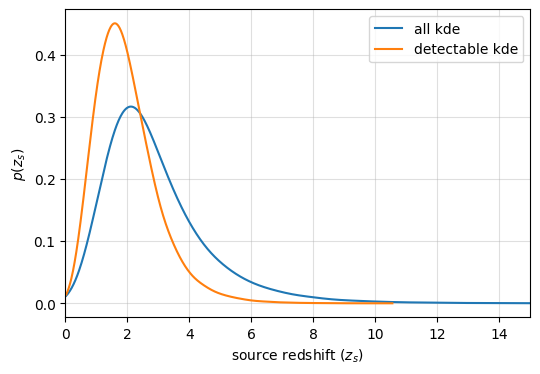

In [41]:
# sample source redshifts (source frame)
zs = params['zs']
zs_detectable = params_detectable['zs']

plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="zs", 
    param_dict=params, # or the json file name
    plot_label='all',
    histogram=False,
);
lerplt.param_plot(
    param_name="zs", 
    param_dict=params_detectable,
    plot_label='detectable',
    histogram=False,
);
plt.xlabel(r'source redshift ($z_s$)')
plt.ylabel(r'$p(z_s)$')
plt.xlim(0,15)
plt.grid(alpha=0.4)
plt.show()


* From this result, it should be known that you could set z_max lower (as well as mtot_max).

* now, let's see source mass_distribution (source frame).

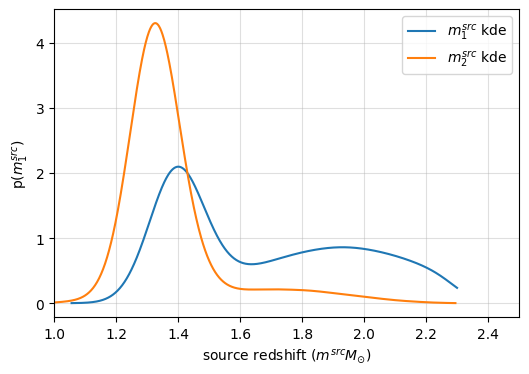

In [42]:
plt.figure(figsize=(6, 4))
lerplt.param_plot(
    param_name="mass_1_source", 
    param_dict=params, # or the json file name
    plot_label=r"$m_1^{src}$",
    histogram=False,
);
lerplt.param_plot(
    param_name="mass_2_source", 
    param_dict=params,
    plot_label=r"$m_2^{src}$",
    histogram=False,
);
plt.xlabel(r'source redshift ($m^{src} M_{\odot}$)')
plt.ylabel(r'p($m_1^{src}$)')
plt.xlim(1,2.5)
plt.grid(alpha=0.4)
plt.show()

In [7]:
from ler.rates import GWRATES

ler = GWRATES(
    npool=2,
    snr_type='inner_product',  # or 'interpolation'
)


Initializing GWRATES class...


Initializing CBCSourceRedshiftDistribution...

luminosity_distance interpolator will be loaded from ./interpolator_pickle/luminosity_distance/luminosity_distance_0.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_0.pickle
using ler available merger rate density model: merger_rate_density_bbh_popI_II_oguri2018
merger_rate_density_bbh_popI_II_oguri2018 interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_bbh_popI_II_oguri2018_2.pickle
merger_rate_density_detector_frame interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_detector_frame_3.pickle
using user provided custom source redshift class/object

Initializing CBCSourceParameterDistribution...

using ler available zs function : source_redshift
using ler available source_frame_masses function : binary_masses_BBH_popI_II_po

In [11]:
ler.gw_param_samplers_params['source_frame_masses']['mminbh'], ler.gw_param_samplers_params['source_frame_masses']['mmaxbh']

(4.98, 112.5)